#### 필수 목표

데이터 소개
- Bellabeat(벨라비트): 2013~2014년 크로아티아에서 설립된 여성 건강 및 웰니스 중심의 스마트 웨어러블 기기 및 IT 기업 

분석 흐름 개요
- 데이터 EDA
- 데이터 정제 및 데이터 전처리
- 데이터 시각화 및 분석
- 데이터 기반 인사이트 도출

1. [비즈니스 목표 세우기]

2. [사용된 데이터 소스 설명] 출처, 구성, 관측단위, 주요 변수를 소개
- 관측 단위와 기간
    - 관측 단위: Fitbit 사용자(30명) × 활동/수면/심박 데이터, 사용자-일(Day)
    - 기간: 2016년 3월 12일 ~ 2016년 5월 12일(62일)
- 주요 변수 소개: 하드/노말/소프트 유저, 활동날짜()

3. [EDA] 행/열 개수를 제시
- 로딩 직후와 정제 후를 구분해서 행·열 개수(shape)와 결측치 개수를 각각 보고하기

4. [EDA] 분석할 데이터의 컬럼 타입과 기술통계(min/median/mean/max, 결측치 수)를 제시

5. [전처리 과정] 결측치/이상치/전처리 처리 규칙을 수립·실행하고, 처리 이유를 작성

6. [주요 분석제시 및 시각화] 한개 혹은 여러개의 기준 컬럼을 두고 집계함수로 비교분석 후 시각화

7. [인사이트 제시 ]최소 1개 이상의 인사이트를 수치/그래프/그림/해석으로 제시

#### 심화 목표

1. EDA를 더 다양한 형식(산점도, 박스플롯  등)으로 나타내보기

2. 사용자별 평균 활동량(예: mean_steps)을 기준으로 상위 20% / 하위 20% 그룹을 만들어 주요 지표(걸음수, 칼로리, 비활동 시간 등)를 비교

3. 월별/분기별 평균 활동량을 계산해 장기 추세(증가·감소)와 계절성(예: 여름·겨울 차이)을 파악

4. 요일별·시간대별 평균 Steps(또는 활동 비율)를 히트맵으로 그려 피크 시간대를 파악하고, 주중 vs 주말 차이를 분석


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# df34 = pd.read_csv("../data/dailyActivity_merged34.csv")
# df45 = pd.read_csv("../data/dailyActivity_merged45.csv")

# df35 = pd.concat([df34, df45])
# df = df35.copy()

In [ ]:
df = pd.read_csv("../data/dailyActivity_merged_fin_sum.csv")
act = df.copy()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [ ]:
act.shape
#(1373, 15)

In [ ]:
# 전체 정보
act.info()

In [ ]:
# 전체 데이터 기술통계
act.describe()

In [ ]:
# 결측치 확인
act.isnull().sum()

In [ ]:
#ID 종류 확인
act['Id'].nunique()

In [ ]:
# Id별 데이터 개수 확인
act['Id'].value_counts().describe()

In [ ]:
act['ActivityDate'].value_counts()

---

#### 전처리 과정

In [ ]:
# 날짜 타입 변환
act["ActivityDate"] = pd.to_datetime(act["ActivityDate"])
act1 = act.copy() # 날짜 타입 변환까지 한 백업본

act = act.sort_values("ActivityDate")

# 요일 변수 생성
act["Weekday"] = act["ActivityDate"].dt.day_name()

# 활동강도 합산 지표 생성
act["TotalActiveMinutes"] = (act["VeryActiveMinutes"]
                            + act["FairlyActiveMinutes"]
                            + act["LightlyActiveMinutes"])

In [ ]:
# 요일 순서 고정
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
act['DayofWeek'] = pd.Categorical(act['Weekday'], categories=day_order, ordered=True)
print(act['DayofWeek'].value_counts()) # 각 요일별 데이터 개수 확인

DayofWeek
Tuesday      201
Saturday     199
Friday       199
Wednesday    198
Thursday     195
Sunday       193
Monday       188
Name: count, dtype: int64


In [54]:
# 미착용일 조건 정의
non_wear_cond = (
   (act["TotalSteps"] == 0) &
   (act["TotalDistance"] == 0) &
   (act["SedentaryMinutes"] >= 1380)   # 하루 23시간 이상 앉아있음
)

# 미착용일 제외
act = act.loc[~non_wear_cond].copy()

In [5]:
# 마일을 킬로미터로 변환
MILE_TO_KM = 1.60934
distance_cols = [
    "TotalDistance",
    "TrackerDistance",
    "LoggedActivitiesDistance",
    "VeryActiveDistance",
    "ModeratelyActiveDistance",
    "LightActiveDistance",
    "SedentaryActiveDistance",
]
for col in distance_cols:
    act[f"{col}_km"] = act[col] * MILE_TO_KM

In [89]:
# 한글 폰트 설정(윈도우 추천)

import matplotlib.font_manager as fm

candidates = ["Malgun Gothic", "맑은 고딕", "NanumGothic", "굴림", "Gulim"]
installed = {f.name for f in fm.fontManager.ttflist}

for font in candidates:
    if font in installed:
        plt.rcParams["font.family"] = font
        break

plt.rcParams["axes.unicode_minus"] = False  # 마이너스(-) 깨짐 방지

print("선택된 폰트:", plt.rcParams["font.family"])

선택된 폰트: ['Malgun Gothic']


---

시각화

무엇을 분석할 것인가?
기준: 사용자(입력 차이)
- 자동기록자/수동입력자
    - a. 완전 자동 기록자
    - b. 자동기록자 + 수동입력자
    - c. 완전 수동입력자

- 왜? 자동입력자와 수동입력자의 차이를 분석하고 싶어서. 

무엇을 분석할 것인가?
- 활동 날짜
- 강도: 현재는 거리만 비교할 수 있음

주의점: 수동입력-불확실함, 거리만 존재-불확실함, 불확실함의 결정체. 

C:\Users\dcf10\AppData\Local\Temp\ipykernel_8280\3414519465.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=log_type_act, x='UserCategory', order=category_order, palette='Set2')


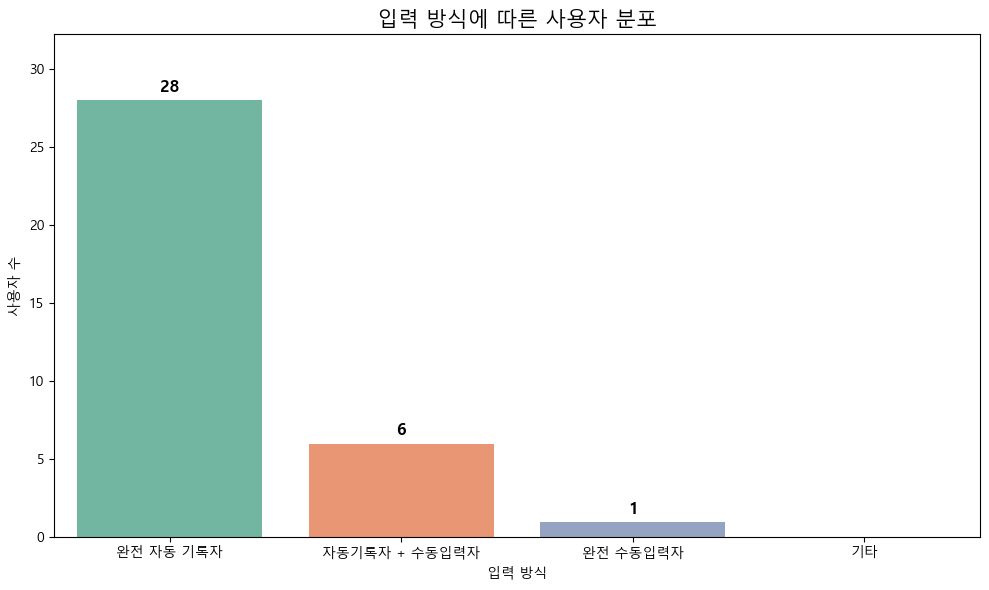

In [ ]:
# 입력 방식에 따른 사용자 분포 분석
# 사용자별 자동(Tracker) vs 수동(Logged) 거리 합계 계산
log_type_act = act.groupby('Id').agg({
    'TrackerDistance_km': 'sum',
    'LoggedActivitiesDistance_km': 'sum'
}).reset_index()

def classify_log_behavior(row):
    tracker = row['TrackerDistance_km']
    manual = row['LoggedActivitiesDistance_km']
    
    # 완전 자동 기록자: 기기 기록은 있고, 수동 입력은 0인 경우
    if tracker > 0 and manual == 0:
        return '완전 자동 기록자'
    
    # 자동기록자 + 수동입력자: 둘 다 기록이 있는 경우
    elif tracker > 0 and manual > 0:
        return '자동기록자 + 수동입력자'
    # 완전 수동입력자: 기기 기록은 0이고, 수동 입력만 있는 경우
    elif tracker == 0 and manual > 0:
        return '완전 수동입력자'
    
    else:
        return '기타'

log_type_act['UserCategory'] = log_type_act.apply(classify_log_behavior, axis=1)

plt.figure(figsize=(10, 6))

category_order = ['완전 자동 기록자', '자동기록자 + 수동입력자', '완전 수동입력자', '기타']

ax = sns.countplot(data=log_type_act, x='UserCategory', order=category_order, palette='Set2')

plt.title('입력 방식에 따른 사용자 분포', fontsize=15)
plt.xlabel('입력 방식')
plt.ylabel('사용자 수')

if not log_type_act.empty:
    max_count = log_type_act['UserCategory'].value_counts().max()
    plt.ylim(0, max_count * 1.15) # 15% 여유 공간 확보

for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3, fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

1. 완전 자동 기록을 사용하는 이용자가 80% 비율이다. 
2. 완전 수동입력자는 1명이며, 데이터를 확인해봤을 경우 수동 기록 거리가 일률적이므로 데이터의 가치가 떨어지는 편이다. 
3. 자동 기록과 수동 입력을 혼용하는 이용자는 약 17%이다. 

- 완전 자동 기록자의 비율이 높으므로 이들을 토대로 데이터 분석을 진행하는 편이 좋다.
- 하지만 개인별 맞춤 분석을 위해서 혼용 이용자도 분석할 수 있다. 

C:\Users\dcf10\AppData\Local\Temp\ipykernel_8280\4071739642.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=manual_users_only, x='Id', y='TotalCount', palette=colors, alpha=0.6)


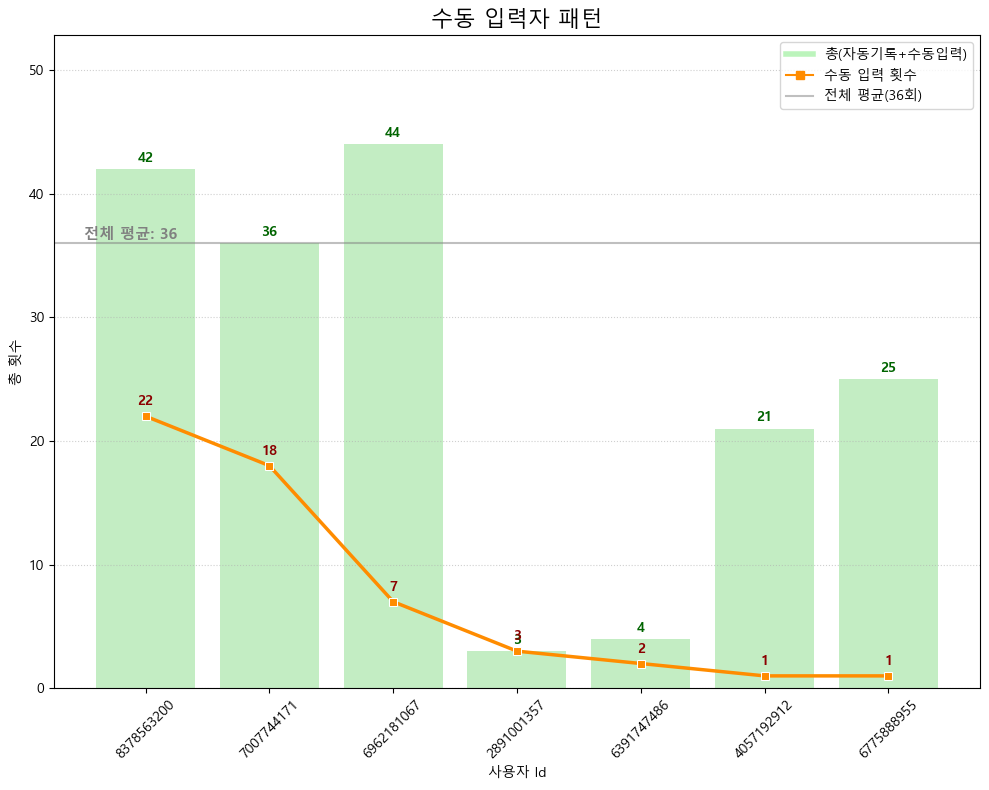

In [101]:
from matplotlib.lines import Line2D

# 총 기록 횟수 (Id별 전체 행 수)
total_counts = act.groupby('Id').size().reset_index(name='TotalCount')

# 수동 입력 횟수 (거리 > 0인 경우만)
# 주의: 거리가 0인 수동 입력(예: 웨이트)은 제외되므로, 
# '완전 수동 사용자'라도 막대(전체)와 선(거리>0)의 높이가 다를 수 있습니다.
manual_counts = act[act['LoggedActivitiesDistance_km'] > 0].groupby('Id').size().reset_index(name='ManualCount')

# 자동 기록 총합 (완전 수동 입력자를 찾아내기 위함)
tracker_sums = act.groupby('Id')['TrackerDistance_km'].sum().reset_index(name='TotalTrackerDist')

manual_users_only = pd.merge(manual_counts, total_counts, on='Id', how='inner')
manual_users_only = pd.merge(manual_users_only, tracker_sums, on='Id', how='left')

# 완전 수동 입력자 여부 판별
manual_users_only['IsPureManual'] = manual_users_only['TotalTrackerDist'] == 0

manual_users_only['Id'] = manual_users_only['Id'].astype(str)
manual_users_only = manual_users_only.sort_values('ManualCount', ascending=False)

colors = ['lightgreen'] * len(manual_users_only)

plt.figure(figsize=(10, 8))
ax = sns.barplot(data=manual_users_only, x='Id', y='TotalCount', palette=colors, alpha=0.6)
sns.lineplot(data=manual_users_only, x='Id', y='ManualCount', color='darkorange', marker='s', linewidth=2.5, label='Manual Entry Frequency')

# 전체 평균선 (y=36)
plt.axhline(y=36, color='gray', linestyle='-', linewidth=1.5, alpha=0.5)
plt.text(x=-0.5, y=36, s='전체 평균: 36', color='gray', va='bottom', ha='left', fontweight='bold', fontsize=11)

max_val = manual_users_only['TotalCount'].max()
plt.ylim(0, max_val * 1.2)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3, color='darkgreen', weight='bold')

for i, val in enumerate(manual_users_only['ManualCount']):
    ax.text(i, val + (max_val * 0.02), int(val), ha='center', color='darkred', weight='bold')

plt.title('수동 입력자 패턴', fontsize=16)

legend_elements = [Line2D([0], [0], color='lightgreen', lw=4, label='총(자동기록+수동입력)', alpha=0.6),
                   Line2D([0], [0], color='darkorange', marker='s', label='수동 입력 횟수'),
                   Line2D([0], [0], color='gray', linewidth=1.5, label='전체 평균(36회)', alpha=0.5)] # 범례에도 추가함
plt.legend(handles=legend_elements)

plt.xlabel('사용자 Id')
plt.ylabel('총 횟수')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# 평균 기록 횟수
act['Id'].value_counts().mean() 

np.float64(35.68571428571428)

1. 수동 입력 이용자 7명을 추려내 자동 기록과 수동 입력을 비교했다.
2. 수동 입력이 총 입력 횟수의 50% 이상인 이용자는 4명이며, 그중 2명은 총 입력 횟수가 적었다.

총 정리
- 기기 이용자 35명 중 수동 입력 기능을 사용하는 이용자는 약 20%이다.
- 수동 입력 기능을 적극적으로 사용하는 이용자(총 기록 횟수의 50% 이상)의 비율은 약 11.4%이다. 
- 수동 입력 기능을 적극적으로 사용하는 이용자 중 총 기록횟수의 평균(36회)을 넘는 이용자는 2명으로, 전체 비율의 5.7%를 차지한다. 
- 모수가 적지만 수동 입력 기능을 적극적으로 사용하는 이용자의 비율이 낮으므로 분석 필요성이 떨어진다.

완전 자동 기록자와 혼용 이용자의 무슨 차이를 비교하고 싶은가?
- 일단 수동 입력 가능한 것은 거리 밖에 없다. 강도별 활동 시간, 심박수도 끊긴 시간이 있는 걸 보면 수동 입력 운동 강도에 대한 추산은 불가능에 가깝다.
- 혼용 이용자 패턴: 언제, 얼마나 수동 입력을 했는지 : 필요한 정보인가? 아니다. 개인적 호기심은 빼자. 

---

그렇다면 지금 해야할 것은 무엇인가? 
- 현재 진행한 요일별/날짜별 총 활동 시간 이외
- 날짜별 사용자 수를 점검해보니 데이터 분석의 정확도를 높이기 위해선 3월 31일 이전 데이터는 제외해볼 것을 생각해야 한다.
- 날짜별 총 걸음수, 날짜별 강도별 활동 시간, 날짜별 소모 칼로리가 가능하다.

---

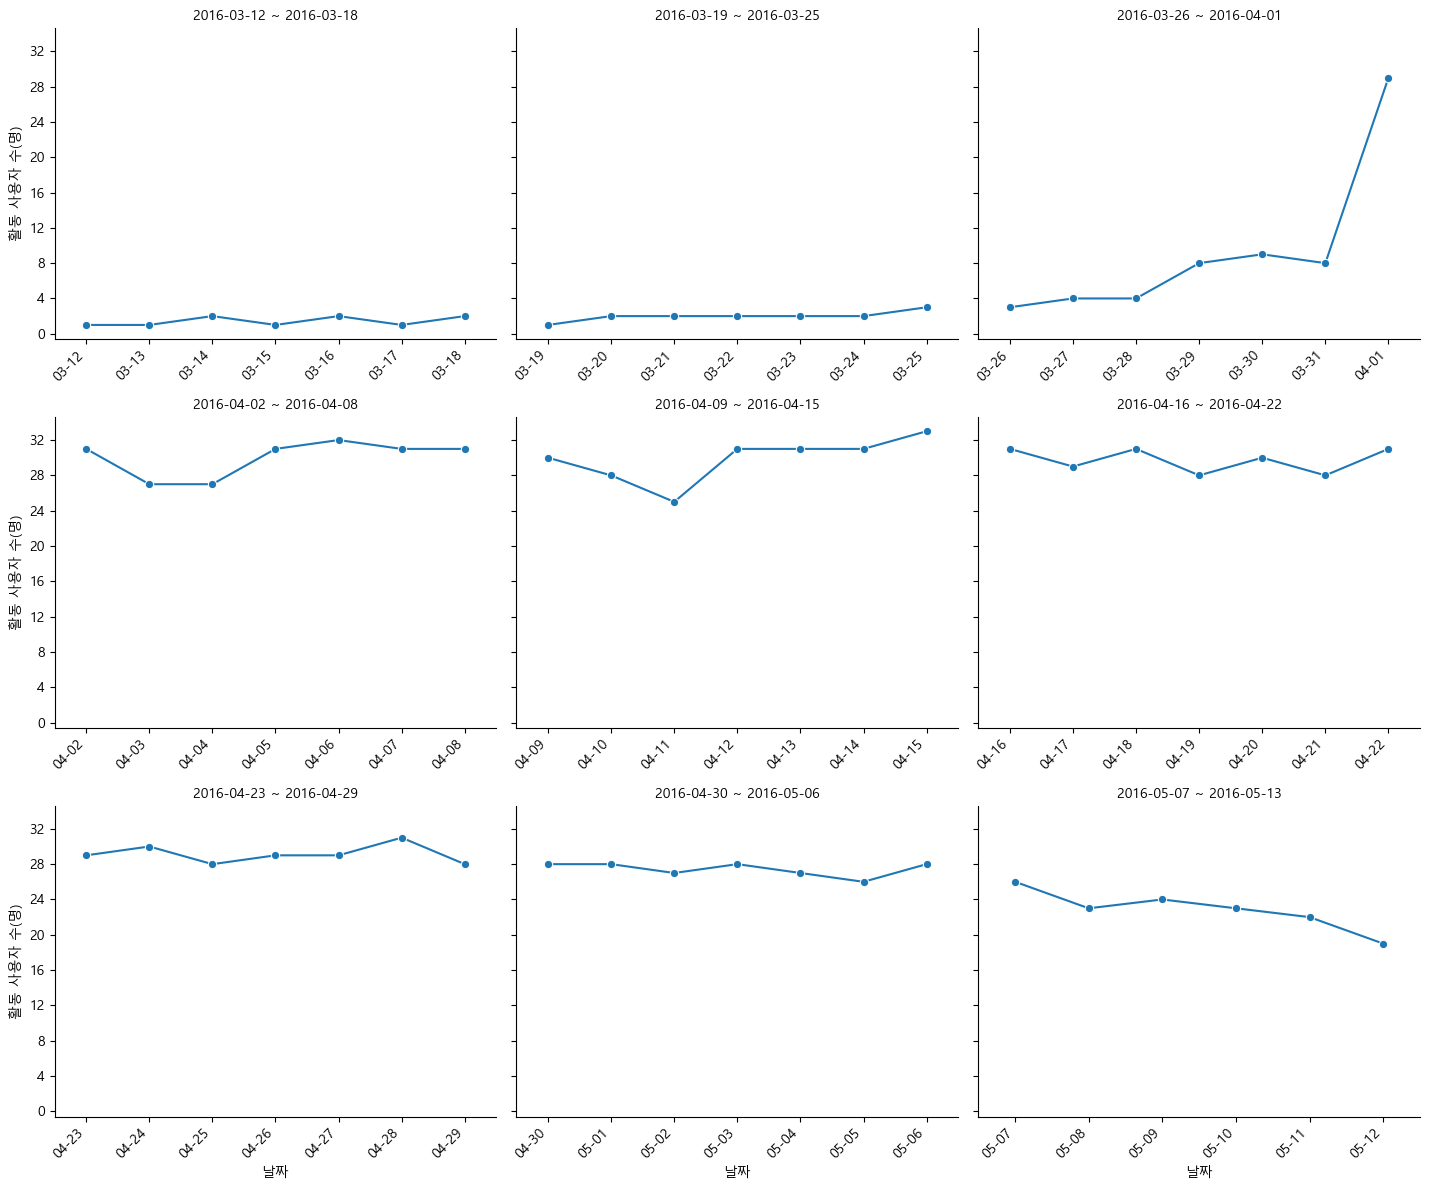

In [ ]:
# 날짜별 활동 사용자 수 시각화
# 데이터의 가장 첫 날을 기준으로 7일씩 끊음
import matplotlib.dates as mdates
start_point = act['ActivityDate'].iloc[0] 

week_starts = start_point + pd.to_timedelta(act['WeekNum'] * 7, unit='D')
week_ends = week_starts + pd.to_timedelta(6, unit='D')
act['DateRange'] = week_starts.dt.strftime('%Y-%m-%d') + ' ~ ' + week_ends.dt.strftime('%Y-%m-%d')

daily_user_counts = act.groupby(['ActivityDate', 'DateRange'])['Id'].nunique().reset_index(name='UserCount')
ordered_weeks = daily_user_counts.sort_values('ActivityDate')['DateRange'].unique()

g = sns.relplot(
    data=daily_user_counts, 
    x='ActivityDate', 
    y='UserCount',
    col='DateRange',
    col_order=ordered_weeks,
    col_wrap=3,
    kind='line',
    marker='o',
    height=4, 
    aspect=1.2,
    facet_kws={'sharey': True, 'sharex': False} 
)

for ax in g.axes.flat:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))

    if ax.get_lines():
        dates = ax.get_lines()[0].get_xdata()
        if len(dates) > 0:
            buffer = 0.5 
            ax.set_xlim(dates.min() - buffer, dates.max() + buffer)

    from matplotlib.ticker import MaxNLocator
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

g.set_titles("{col_name}")
g.set_axis_labels("날짜", "활동 사용자 수(명)")

plt.tight_layout()
plt.show()

1. 날짜별 이용자 수를 확인해보니 3월 31일까지는 이용자 수가 적음을 알 수 있다. 
2. 4월부터 이용자 수가 안정적이나 5월 7일부터는 이용자 수가 적어짐을 알 수 있다.
- 3월은 장비 착용에 익숙하지 않아 이용자 수가 적었는가?
- 5월 7일부터는 장비 착용을 하지 않아도 되어 이용자 수가 적어졌는가?  

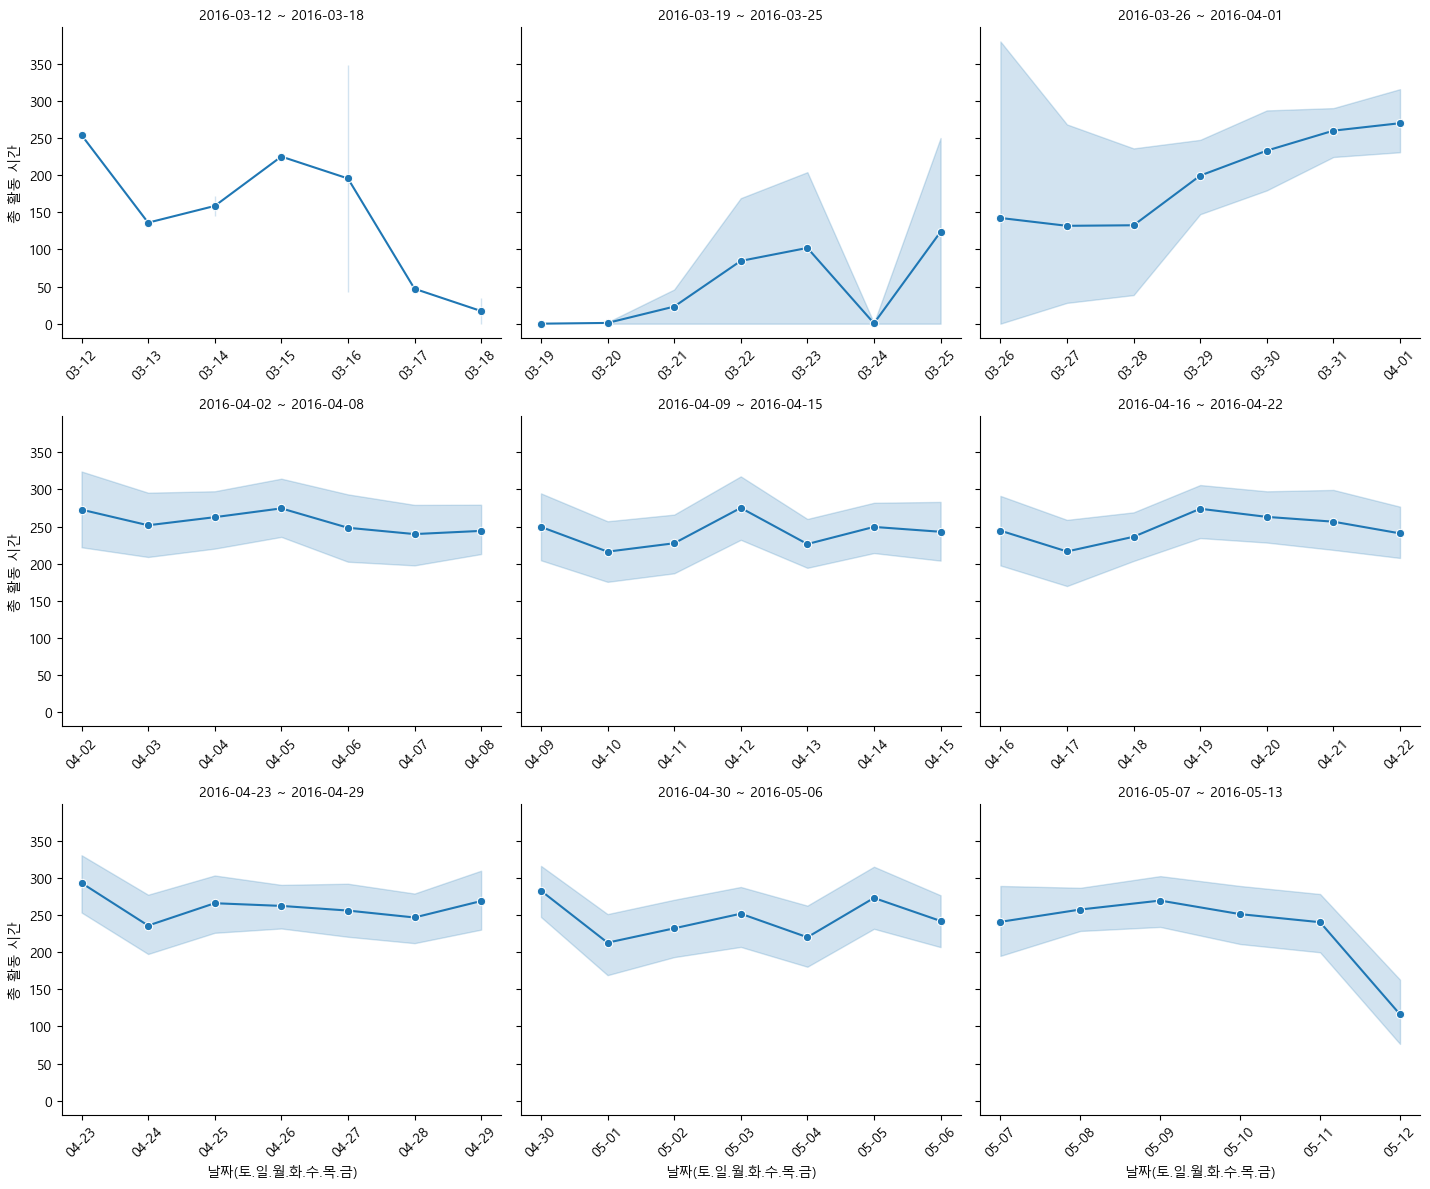

In [ ]:
# 날짜별 총 활동 시간 시계열
import matplotlib.dates as mdates
start_point = act['ActivityDate'].iloc[0] 

act['WeekNum'] = (act['ActivityDate'] - start_point).dt.days // 7

week_starts = start_point + pd.to_timedelta(act['WeekNum'] * 7, unit='D')
week_ends = week_starts + pd.to_timedelta(6, unit='D')

act['DateRange'] = week_starts.dt.strftime('%Y-%m-%d') + ' ~ ' + week_ends.dt.strftime('%Y-%m-%d')

ordered_weeks = act['DateRange'].unique()

g = sns.relplot(
    data=act, 
    x='ActivityDate', 
    y='TotalActiveMinutes', 
    col='DateRange',
    col_order=ordered_weeks,
    col_wrap=3,
    kind='line', 
    marker='o',
    height=4, 
    aspect=1.2,
    facet_kws={'sharey': True, 'sharex': False} 
)

for ax in g.axes.flat:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=1)) # interval 조정하면 날짜 간격 변경 가능
    plt.setp(ax.get_xticklabels(), rotation=45)

g.set_titles("{col_name}")
g.set_axis_labels("날짜(토.일.월.화.수.목.금)", "총 활동 시간")

plt.tight_layout()
plt.show()

1. 위의 날짜별 이용자수와 조합했을 때, 3월 31일까지 데이터가 안정되지 않은 이유를 알 수 있다. 이용자 수가 적어 작은 값에도 그래프가 널뛰기하는 현상을 보이고 있다.
2. 4월에는 안정화되었지만 5월 12일에는 총 활동시간이 급감하는 모습을 보였다. 
3. 안정화된 4월달에는 대체로 총 활동 시간이 200~300분(3시간 20분~5시간) 사이를 오갔다. 
- 중강도 이상의 활동을 하기에는 긴 시간이라 추측된다. 
- 4월달의 각 강도별 활동 시간을 조사한다면 분석에 유의미한 데이터를 얻을 수 있을까?

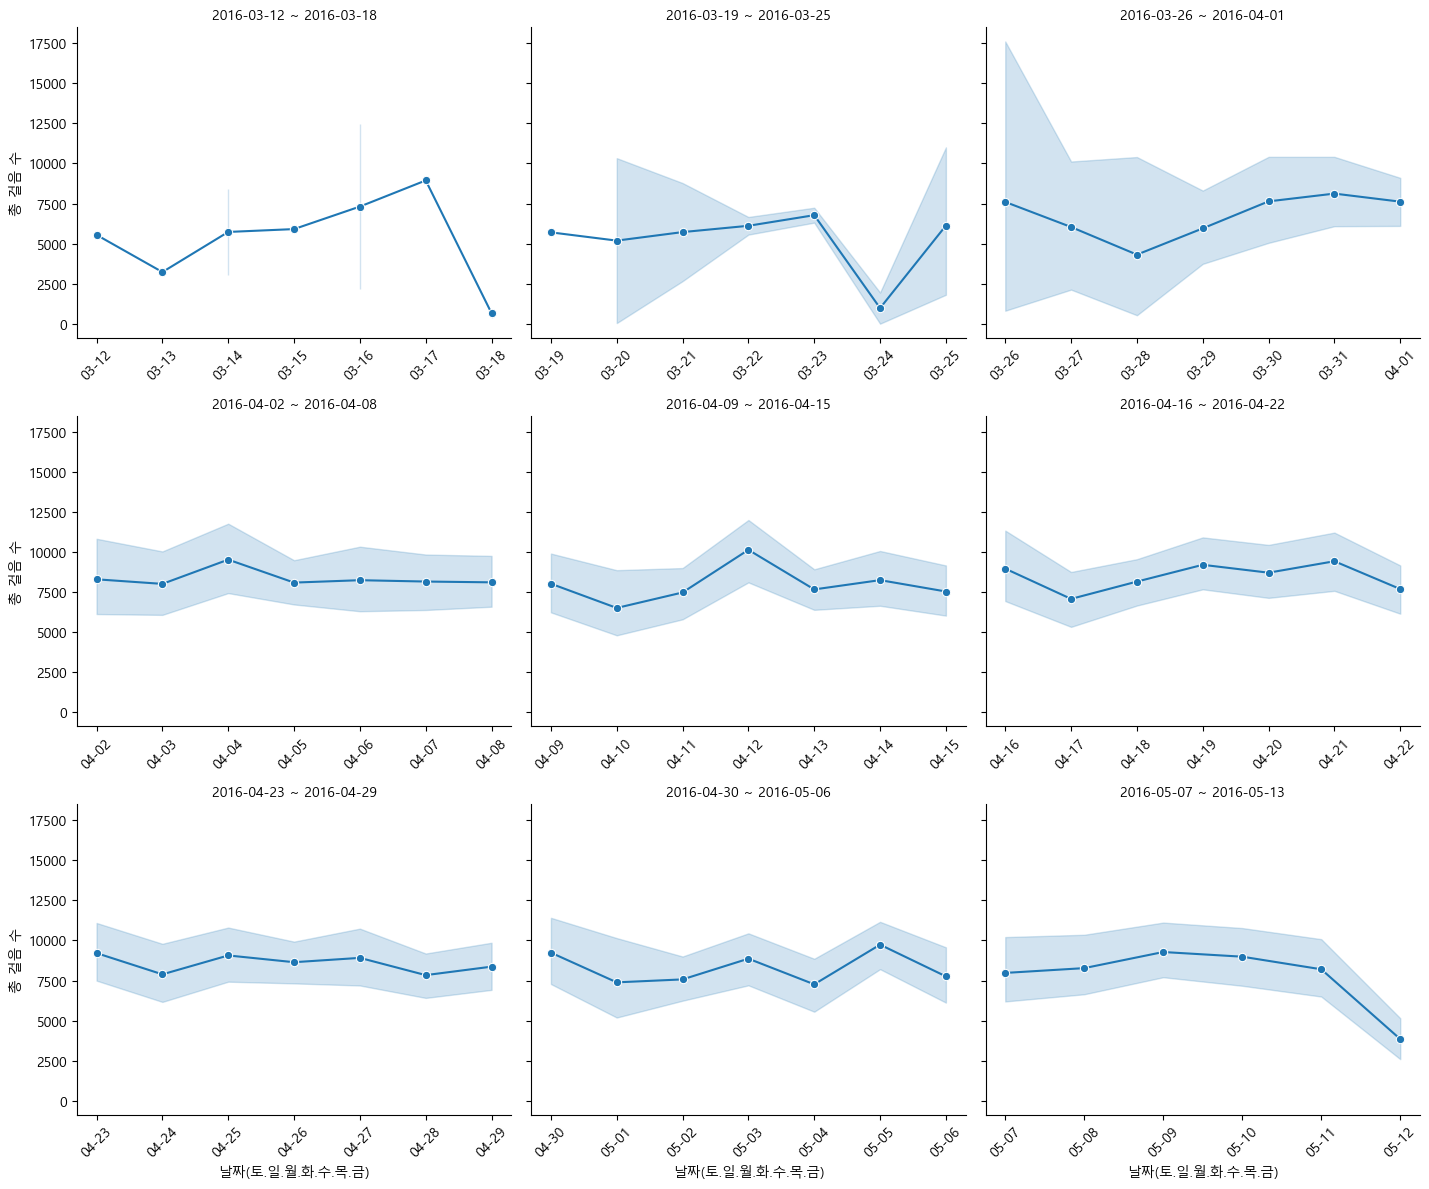

In [70]:
# 날짜별 총 걸음 수 시계열
# 날짜 범위(Period) 생성 로직
# 데이터의 가장 첫 날을 기준으로 7일씩 끊어서 범위를 만듭니다.
import matplotlib.dates as mdates
start_point = act['ActivityDate'].iloc[0] # 정렬이 되어 있으므로 첫 번째 행이 가장 빠른 날

# 시작일로부터 몇 주 지났는지 계산 (벡터화 연산)
act['WeekNum'] = (act['ActivityDate'] - start_point).dt.days // 7

# 주차별 시작일, 종료일 계산
week_starts = start_point + pd.to_timedelta(act['WeekNum'] * 7, unit='D')
week_ends = week_starts + pd.to_timedelta(6, unit='D')

# 'YYYY-MM-DD ~ YYYY-MM-DD' 형태의 문자열 생성
act['DateRange'] = week_starts.dt.strftime('%Y-%m-%d') + ' ~ ' + week_ends.dt.strftime('%Y-%m-%d')

# 그래프에 표시할 순서 추출 (이미 날짜순 정렬된 상태라 unique()만 해도 순서가 맞음)
ordered_weeks = act['DateRange'].unique()

# 3. 격자형(FacetGrid) 시각화 수정
g = sns.relplot(
    data=act, 
    x='ActivityDate', 
    y='TotalSteps', 
    col='DateRange',
    col_order=ordered_weeks,
    col_wrap=3,
    kind='line', 
    marker='o',
    height=4, 
    aspect=1.2,
    facet_kws={'sharey': True, 'sharex': False} 
)

# 4. 그래프 제목 및 라벨 다듬기
for ax in g.axes.flat:
    # X축 날짜를 '월-일' 형태로 표시 (예: 03-12)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    
    # 날짜가 너무 많으면 2일 간격으로 표시 (선택 사항)
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=1)) 
    
    # 날짜 라벨 회전
    plt.setp(ax.get_xticklabels(), rotation=45)

# 3. 그래프 제목 및 라벨 정리
g.set_titles("{col_name}")
g.set_axis_labels("날짜(토.일.월.화.수.목.금)", "총 걸음 수")

plt.tight_layout()
plt.show()

In [ ]:
# 1. 3월 19일 데이터만 추출
target_date = '2016-03-19'
suspect_data = act[act['ActivityDate'] == target_date]

print(f"--- {target_date} 상세 분석 ---")
print(f"1. 기록한 총 사용자 수: {len(suspect_data)}명")
print(f"2. 평균 총 걸음 수: {suspect_data['TotalSteps'].mean():.0f}보")
print(f"3. 평균 활동 시간: {suspect_data['TotalActiveMinutes'].mean():.0f}분")

print("\n--- 개별 사용자 데이터 ---")
print(suspect_data[['Id', 'TotalSteps', 'TotalActiveMinutes', 'TrackerDistance_km']])

--- 2016-03-19 상세 분석 ---
1. 기록한 총 사용자 수: 1명
2. 평균 총 걸음 수: 5702보
3. 평균 활동 시간: 0분

--- 개별 사용자 데이터 (범인 찾기) ---
             Id  TotalSteps  TotalActiveMinutes  TrackerDistance_km
508  4020332650        5702                   0            6.582201


In [ ]:
# 1. 3월 24일 데이터만 추출
target_date = '2016-03-24'
suspect_data = act[act['ActivityDate'] == target_date]

print(f"--- {target_date} 상세 분석 ---")
print(f"1. 기록한 총 사용자 수: {len(suspect_data)}명")
print(f"2. 평균 총 걸음 수: {suspect_data['TotalSteps'].mean():.0f}보")
print(f"3. 평균 활동 시간: {suspect_data['TotalActiveMinutes'].mean():.0f}분")

print("\n--- 개별 사용자 데이터 ---")
print(suspect_data[['Id', 'TotalSteps', 'TotalActiveMinutes', 'TrackerDistance_km']])

--- 2016-03-24 상세 분석 ---
1. 기록한 총 사용자 수: 2명
2. 평균 총 걸음 수: 979보
3. 평균 활동 시간: 0분

--- 개별 사용자 데이터 (범인 찾기) ---
             Id  TotalSteps  TotalActiveMinutes  TrackerDistance_km
513  4020332650        1951                   0            2.269169
575  4057192912           7                   1            0.016093


---
- 4월달의 각 강도별 활동 시간을 조사한다면 분석에 유의미한 데이터를 얻을 수 있을까?
- 데이터가 불안정한 3월 31일 이전의 데이터를 제외하고 강도별 활동시간을 조사하겠다.

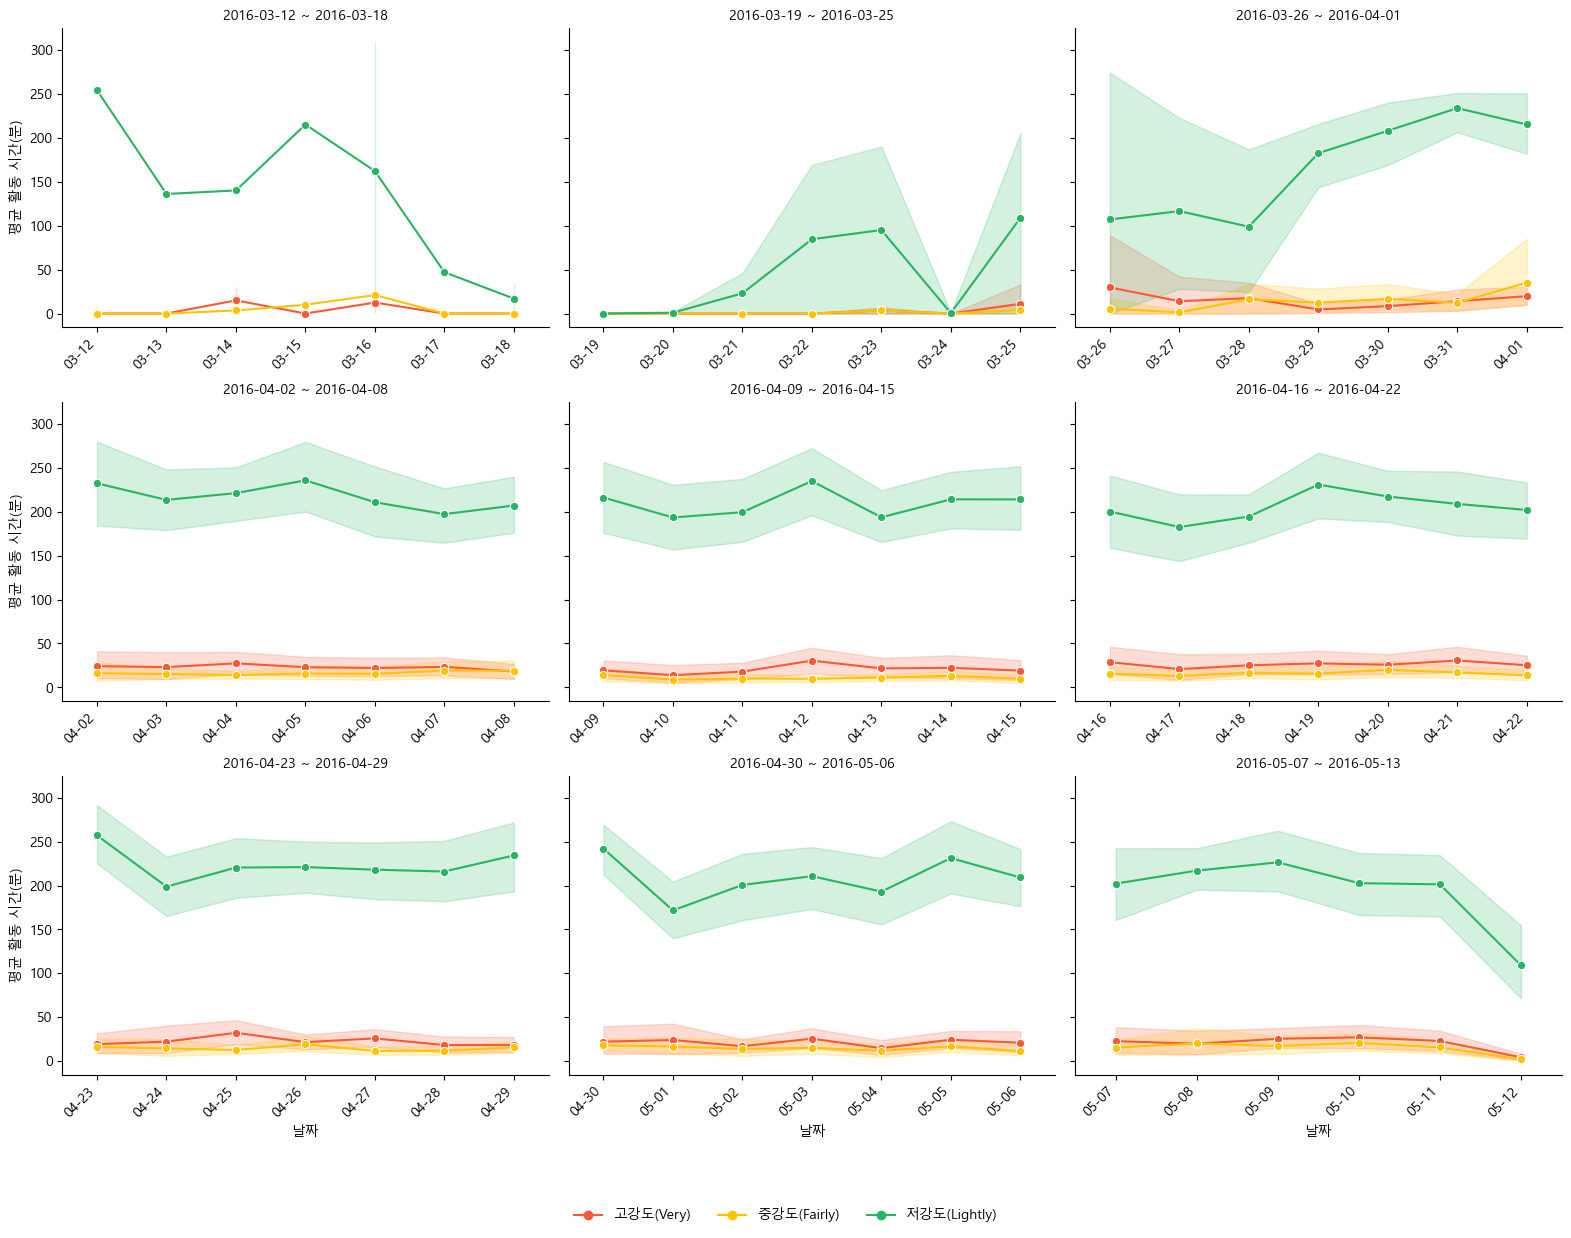

In [ ]:
import matplotlib.dates as mdates

# 날짜별 활동 시간 시계열 (강도별)
start_point = act['ActivityDate'].iloc[0]

# 주차 계산
act['WeekNum'] = (act['ActivityDate'] - start_point).dt.days // 7
week_starts = start_point + pd.to_timedelta(act['WeekNum'] * 7, unit='D')
week_ends = week_starts + pd.to_timedelta(6, unit='D')
act['DateRange'] = week_starts.dt.strftime('%Y-%m-%d') + ' ~ ' + week_ends.dt.strftime('%Y-%m-%d')
ordered_weeks = act['DateRange'].unique()

# -------------------------------------------------------
# 2. [핵심] 데이터 재구조화 (Wide -> Long)
# -------------------------------------------------------
# 세 가지 컬럼을 'ActivityLevel'이라는 하나의 컬럼으로 녹입니다.
melted_act = act.melt(
    id_vars=['ActivityDate', 'DateRange'],  # 기준이 될 컬럼 (날짜, 주차)
    value_vars=['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes'], # 녹일 컬럼들
    var_name='ActivityLevel', # 활동 이름이 들어갈 새 컬럼명
    value_name='Minutes'      # 활동 시간이 들어갈 새 컬럼명
)

# (선택) 범례 이름을 예쁘게 바꾸기 (한글 등)
level_map = {
    'VeryActiveMinutes': '고강도(Very)',
    'FairlyActiveMinutes': '중강도(Fairly)',
    'LightlyActiveMinutes': '저강도(Lightly)'
}
melted_act['ActivityLevel'] = melted_act['ActivityLevel'].map(level_map)

# -------------------------------------------------------
# 3. 격자형(FacetGrid) 시각화
# -------------------------------------------------------
g = sns.relplot(
    data=melted_act, 
    x='ActivityDate', 
    y='Minutes',
    hue='ActivityLevel', # 색상으로 구분할 기준
    col='DateRange',
    col_order=ordered_weeks,
    col_wrap=3,
    kind='line', 
    marker='o',
    height=4, 
    aspect=1.2,
    palette=['#FF5733', '#FFC300', '#28B463'], # 색상 지정 (빨강, 노랑, 초록 계열)
    facet_kws={'sharey': True, 'sharex': False} 
)

# -------------------------------------------------------
# 4. 그래프 꾸미기 (축 꼬임 방지 & 포맷팅)
# -------------------------------------------------------
for ax in g.axes.flat:
    # 날짜 포맷
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
    
    # [중요] 각 subplot의 날짜 범위에 맞게 X축 고정 + 여백
    if ax.get_lines():
        dates = ax.get_lines()[0].get_xdata()
        if len(dates) > 0:
            buffer = 0.5 
            ax.set_xlim(dates.min() - buffer, dates.max() + buffer)
            
    # X축 라벨 회전
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# 제목 및 라벨 정리
g.set_titles("{col_name}")
g.set_axis_labels("날짜", "평균 활동 시간(분)")

# 범례 위치 조정 (그래프 밖으로 이동)
sns.move_legend(g, "upper center", bbox_to_anchor=(0.5, 0.0), ncol=3, title=None, frameon=False)

plt.tight_layout()
# 범례 때문에 하단 여백 추가
plt.subplots_adjust(bottom=0.1) 
plt.show()

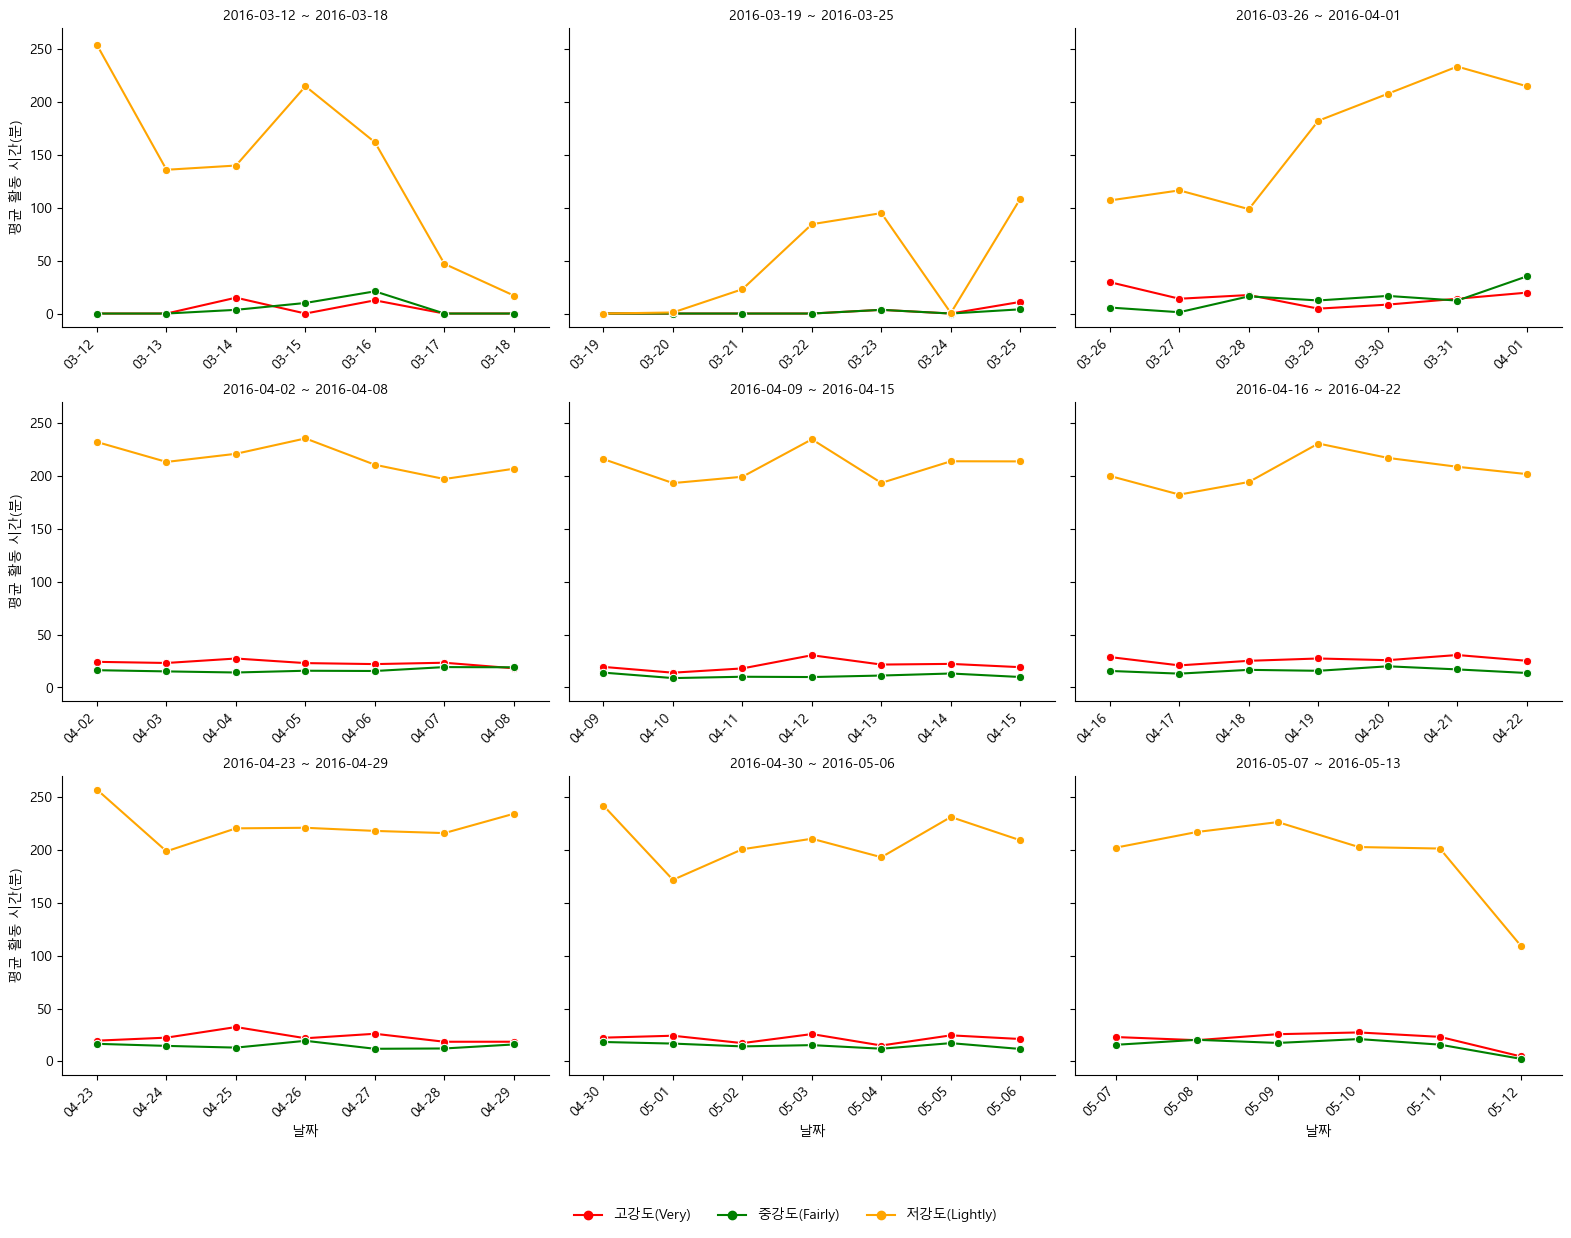

In [ ]:
# 날짜별 활동 시간 시계열 (강도별) - 수정본
import matplotlib.dates as mdates

melted_act = act.melt(
    id_vars=['ActivityDate', 'DateRange'],
    value_vars=['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes'],
    var_name='ActivityLevel',
    value_name='Minutes'
)

level_map = {
    'VeryActiveMinutes': '고강도(Very)',
    'FairlyActiveMinutes': '중강도(Fairly)',
    'LightlyActiveMinutes': '저강도(Lightly)'
}
melted_act['ActivityLevel'] = melted_act['ActivityLevel'].map(level_map)

g = sns.relplot(
    data=melted_act, 
    x='ActivityDate', 
    y='Minutes',
    hue='ActivityLevel', 
    col='DateRange',
    col_order=ordered_weeks,
    col_wrap=3,
    kind='line', 
    marker='o',
    height=4, 
    aspect=1.2,
    palette=['red', 'green', 'orange'], 
    errorbar=None, 
    facet_kws={'sharey': True, 'sharex': False} 
)

for ax in g.axes.flat:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
    
    if ax.get_lines():
        dates = ax.get_lines()[0].get_xdata()
        if len(dates) > 0:
            buffer = 0.5 
            ax.set_xlim(dates.min() - buffer, dates.max() + buffer)
            
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

g.set_titles("{col_name}")
g.set_axis_labels("날짜", "평균 활동 시간(분)")

sns.move_legend(g, "upper center", bbox_to_anchor=(0.5, 0.0), ncol=3, title=None, frameon=False)

plt.tight_layout()
plt.subplots_adjust(bottom=0.1) 
plt.show()

1. 운동량의 대부분은 저강도에 몰려있음을 알 수 있다. 
2. 평균 활동 시간 추정이지만 대체로 고강도 활동 시간이 중강도 활동 시간보다 높음을 알 수 있다. 
- 유의미한 차이인가?
- 중강도와 고강도를 비교할 수 있는 방법은? 

C:\Users\dcf10\AppData\Local\Temp\ipykernel_8280\1897616589.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


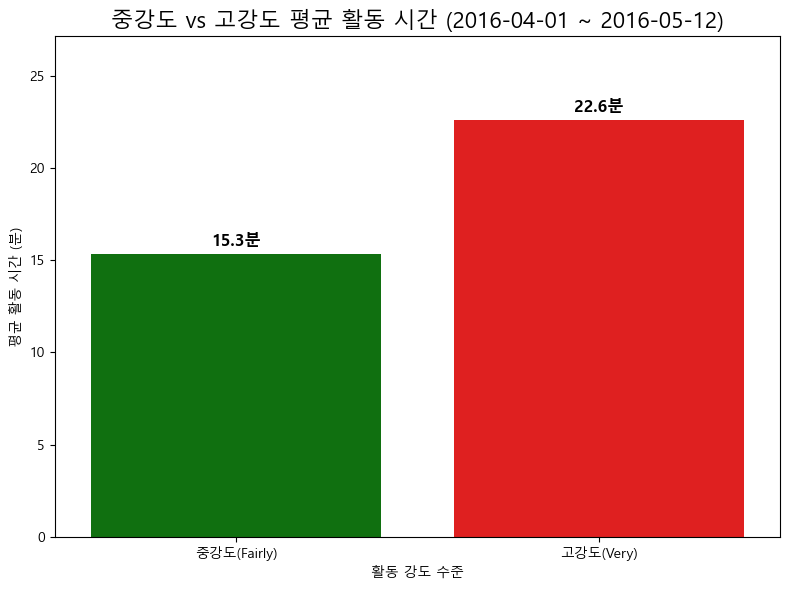

In [97]:
# 중강도 vs 고강도 평균 활동 시간 비교 (2016-04-01 ~ 2016-05-12)
start_date = '2016-04-01'
end_date = '2016-05-12'
filtered_act = act[(act['ActivityDate'] >= start_date) & (act['ActivityDate'] <= end_date)].copy()

fairly_avg = filtered_act['FairlyActiveMinutes'].mean()
very_avg = filtered_act['VeryActiveMinutes'].mean()

summary_df = pd.DataFrame({
    'ActivityLevel': ['중강도(Fairly)', '고강도(Very)'],
    'AverageMinutes': [fairly_avg, very_avg]
})

plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=summary_df,
    x='ActivityLevel',
    y='AverageMinutes',
    palette=['green', 'red']
)

# 5. 그래프 꾸미기
plt.title(f'중강도 vs 고강도 평균 활동 시간 ({start_date} ~ {end_date})', fontsize=16)
plt.xlabel('활동 강도 수준')
plt.ylabel('평균 활동 시간 (분)')
plt.ylim(0, max(fairly_avg, very_avg) * 1.2) # 위쪽 여유 공간 20% 확보

# 값 레이블 추가 (막대 위에 숫자 표시)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f분', padding=3, fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

In [102]:
from scipy import stats

group_a = filtered_act['FairlyActiveMinutes'] # 중강도
group_b = filtered_act['VeryActiveMinutes']   # 고강도

# 2. 정규성 검정 (Shapiro-Wilk)
shapiro_a = stats.shapiro(group_a)
shapiro_b = stats.shapiro(group_b)

print(f"--- 정규성 검정 결과 ---")
print(f"중강도 p-value: {shapiro_a.pvalue:.4f}")
print(f"고강도 p-value: {shapiro_b.pvalue:.4f}")

# 3. 가설 검정 수행
# 두 집단 중 하나라도 정규성을 만족하지 못하면(p < 0.05) -> 윌콕슨 (비모수)
# 둘 다 정규성을 만족하면(p > 0.05) -> 대응표본 t-검정 (모수)
if shapiro_a.pvalue < 0.05 or shapiro_b.pvalue < 0.05:
    print("\n[결과] 정규성을 만족하지 않으므로 '윌콕슨 부호 순위 검정'을 수행합니다.")
    test_result = stats.wilcoxon(group_a, group_b)
    test_name = "Wilcoxon Signed-Rank Test"
else:
    print("\n[결과] 정규성을 만족하므로 '대응표본 t-검정'을 수행합니다.")
    test_result = stats.ttest_rel(group_a, group_b)
    test_name = "Paired T-test"

# 4. 최종 해석
print(f"\n--- {test_name} 결과 ---")
print(f"통계량(Statistic): {test_result.statistic:.4f}")
print(f"p-value: {test_result.pvalue:.4e}") # 과학적 표기법 (예: 1.2e-05)

print("\n--- [최종 결론] ---")
if test_result.pvalue < 0.05:
    print(f"p-value가 0.05보다 작으므로, 두 활동 간의 차이는 '통계적으로 유의미'합니다.")
    print("   (즉, 우연이 아니라 실제로 활동량의 차이가 존재합니다.)")
else:
    print(f"p-value가 0.05보다 크므로, 두 활동 간의 차이는 '통계적으로 유의미하지 않습니다'.")
    print("   (평균값은 다르지만, 편차가 커서 확실한 차이라고 말하기 어렵습니다.)")

--- 정규성 검정 결과 ---
중강도 p-value: 0.0000
고강도 p-value: 0.0000

[결과] 정규성을 만족하지 않으므로 '윌콕슨 부호 순위 검정'을 수행합니다.

--- Wilcoxon Signed-Rank Test 결과 ---
통계량(Statistic): 96204.5000
p-value: 5.6370e-14

--- [최종 결론] ---
p-value가 0.05보다 작으므로, 두 활동 간의 차이는 '통계적으로 유의미'합니다.
   (즉, 우연이 아니라 실제로 활동량의 차이가 존재합니다.)


- 즉, 중강도와 고강도 활동 시간의 차이가 통계적으로 유의미한지 분석한 결과, p-value가 0.05보다 작으므로 두 활동 간의 차이는 통계적으로 유의미하다고 할 수 있다.
- 이용자는 중강도 운동보다 고강도 운동을 선호한다고 볼 수 있다. 

In [ ]:
# 요일별 총 활동 시간 분포 박스플롯
plt.figure(figsize=(12, 6))

# (A) 박스플롯
sns.boxplot(
    data=filtered_act, 
    x='Weekday',
    y='TotalActiveMinutes',
    order=day_order,
    palette='Pastel1',
    showfliers=False
)

# (B) 산점도 (선택)
sns.stripplot(
    data=filtered_act, 
    x='Weekday',
    y='TotalActiveMinutes',
    order=day_order,
    color='black',
    alpha=0.4,
    size=3,
    jitter=True
)

plt.title(f'요일별 총 활동 시간 분포 ({start_date} ~ {end_date})', fontsize=16)
plt.xlabel('요일')
plt.ylabel('총 활동 시간 (분)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()